# Love and Relationships - Country Music

# Purpose:
<h4 style='margin-bottom: 1;'> This script analyzes the Love and Relationships theme in Country Music, identifying recurring patterns and sentiment. It generates visuals to measure emotional depth, map touring patterns, provide insight into sentiment, and highlight thematic transitions.</h4>

![Alt text](Images/Overview.png)

# Initial Setup

In [1]:
# Import Required Libraries
import cartopy.feature as cfeature
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import plotly.io as pio
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import squarify
import random
import nltk

# Import Specific Functions
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter, defaultdict
from tabulate import tabulate

# Ignore ALL Warnings
warnings.filterwarnings('ignore')

# Download NLTK Files
nltk.download('stopwords', quiet = True)

# Define gold_hex_codes for Visuals
gold_hex_codes = [
    '#FFC107', '#F3B500', '#E6A800', '#D99B00', '#CC8E00',
    '#C08200', '#B37500', '#A66800', '#995B00', '#8D4F00',
    '#804200', '#733500', '#662800', '#5A1C00', '#4D0F00',
    '#400200', '#330000', '#270000', '#1A0000', '#0D0000'   
]

# Load Featured Songs
Featured_Songs = pd.read_excel('Data/Love_Analysis.xlsx', sheet_name = 'Featured_Songs')

# Load Touring Artists
Touring_Artists = pd.read_excel('Data/Love_Analysis.xlsx', sheet_name = 'Touring_Artists')

# Load Lyrics in Context
Lyrics_in_Context = pd.read_excel('Data/Love_Analysis.xlsx', sheet_name='Lyrics_in_Context')

# Load Lines Categorized
Lines_Categorized = pd.read_excel('Data/Love_Analysis.xlsx', sheet_name='Lines_Categorized')

# Featured Songs
## [Playlist: Click Here to Access via Spotify](https://open.spotify.com/playlist/4DQ60JVXtbCCtV2Q8MRXqE)

![Alt text](Images/Playlist.png)

## Decades of Love in Country Music

![Alt text](Images/Timeline.png)

## Ranking Songs by Their Love and Relationships Lines

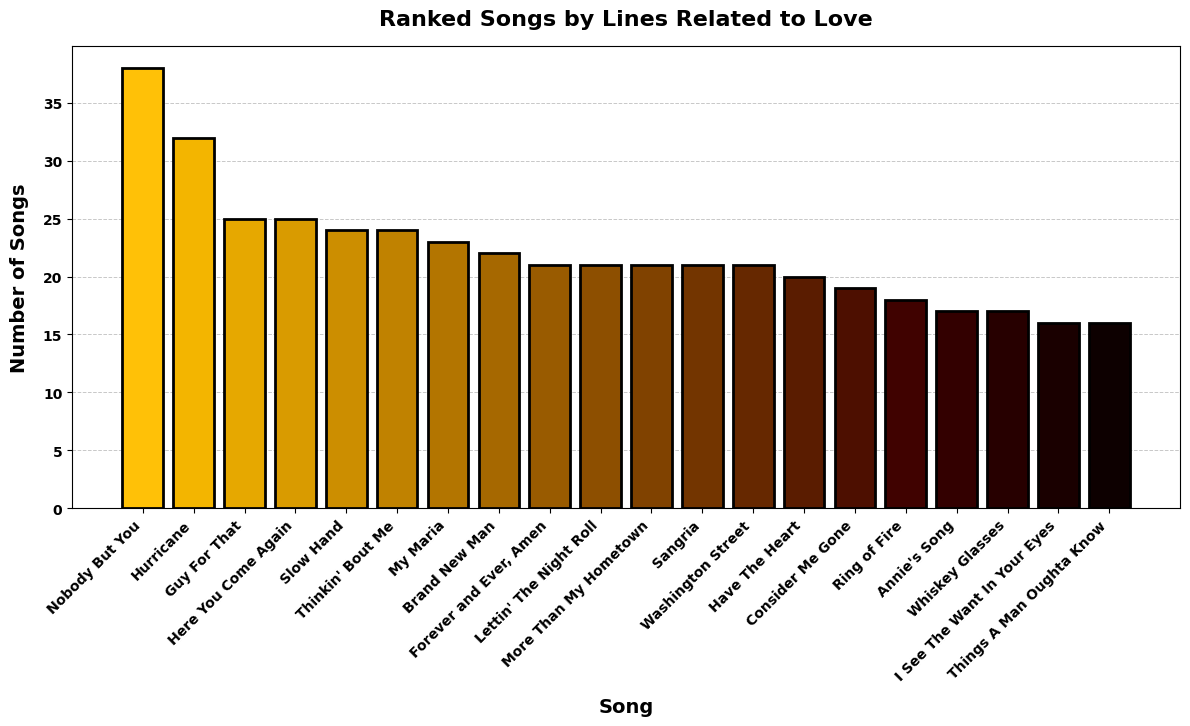

In [2]:
# Sort Data to Display Top Love Songs
Featured_Songs_Sorted = Featured_Songs.sort_values(
    by = ['Love_Lines', 'Song'],
    ascending = [False, True]
)

# Create the Bar Plot
plt.figure(figsize = (12, 7))
plt.bar(Featured_Songs_Sorted['Song'], Featured_Songs_Sorted['Love_Lines'], color = gold_hex_codes, edgecolor = 'black', linewidth = 2)

# Add Title and Labels
plt.xlabel('Song', fontsize = 14, labelpad = 10, fontweight = 'bold')
plt.ylabel('Number of Songs', fontsize = 14, labelpad = 10, fontweight = 'bold')

# Customize Ticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')

# Add Gridlines and Ensure They are Behind Bars
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.7, alpha = 0.7)
plt.gca().set_axisbelow(True)

# Optimize Layout and Display
plt.tight_layout()

# Export Image
plt.savefig('Ranked Songs by Lines Related to Love.png', dpi = 300)

# Add Title
plt.title('Ranked Songs by Lines Related to Love', fontsize = 16, fontweight = 'bold', pad = 15)

# Display Graph
plt.show()

# Featured Artists

![Alt text](Images/Artists.png)

![Alt text](Images/Touring_Artists.png)

## Touring Patterns in 2025

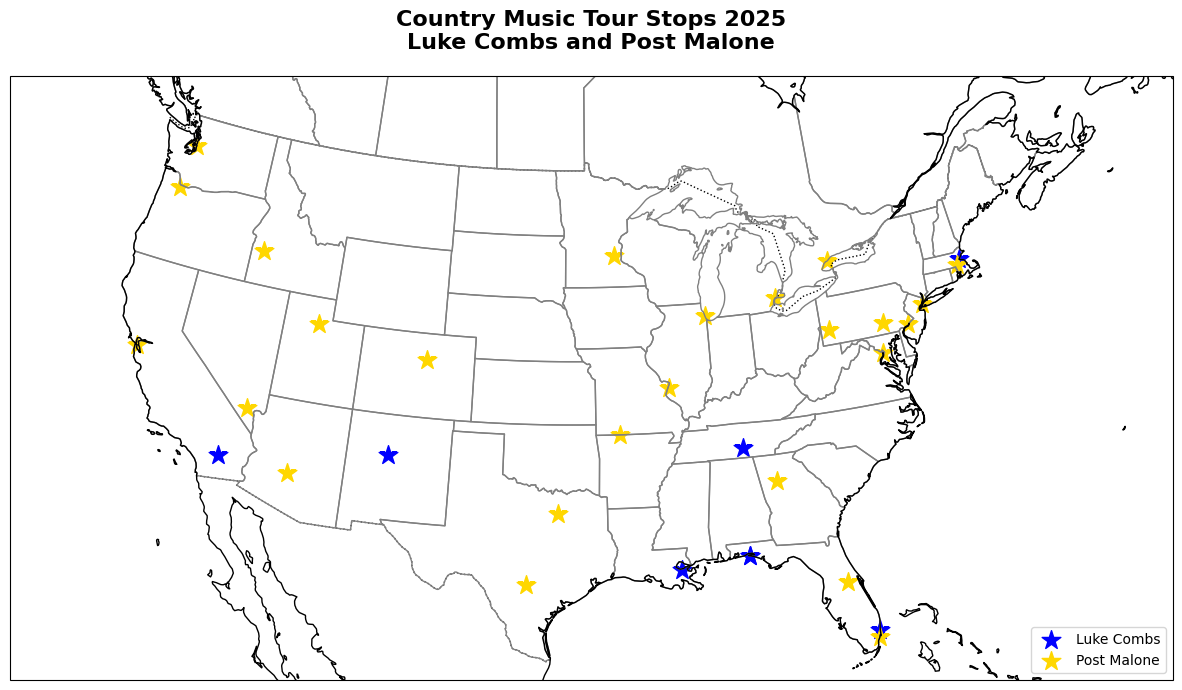

In [3]:
# Geocode the Locations
geolocator = Nominatim(user_agent = 'artist_map')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1)

# Add Latitude and Longitude
Touring_Artists['GeoData'] = Touring_Artists['Location'].apply(geocode)
Touring_Artists['Latitude'] = Touring_Artists['GeoData'].apply(lambda x: x.latitude if x else None)
Touring_Artists['Longitude'] = Touring_Artists['GeoData'].apply(lambda x: x.longitude if x else None)

# Set up Cartopy Map with Lambert Conformal projection
fig, ax = plt.subplots(figsize = (15, 10), subplot_kw = {'projection': ccrs.LambertConformal()})
ax.set_extent([-125, -65, 25, 50], crs = ccrs.PlateCarree())

# Add Country, State, and Coastline Boundaries
ax.add_feature(cfeature.BORDERS, linestyle = ':', edgecolor = 'black')
ax.add_feature(cfeature.STATES, edgecolor = 'gray')
ax.add_feature(cfeature.COASTLINE)

# Plot Locations for Each Artist
for _, row in Touring_Artists.iterrows():
    if row['Artist'] == 'Luke Combs':
        ax.scatter(row['Longitude'], row['Latitude'], transform = ccrs.PlateCarree(), color = 'blue', marker = '*', s = 200, label = 'Luke Combs')
    elif row['Artist'] == 'Post Malone':
        ax.scatter(row['Longitude'], row['Latitude'], transform = ccrs.PlateCarree(), color = 'gold', marker = '*', s = 200, label = 'Post Malone')

# Export Image
plt.savefig('Country Music Tour Stops 2025 Luke Combs and Post Malone.png', dpi = 300)
plt.title('Country Music Tour Stops 2025\nLuke Combs and Post Malone', fontsize = 16, fontweight = 'bold', pad = 20) 

# Add Title and Legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc = 'lower right', fontsize = 10)

# Display Map
plt.show()

![Alt text](Images/Touring_Numbers.png)

# Sentiment in Love Songs

## Sentiment Distribution Across the Love and Relationships Playlist

Text(0.5, 1.0, 'Sentiment Distribution in the Love & Relationships Playlist')

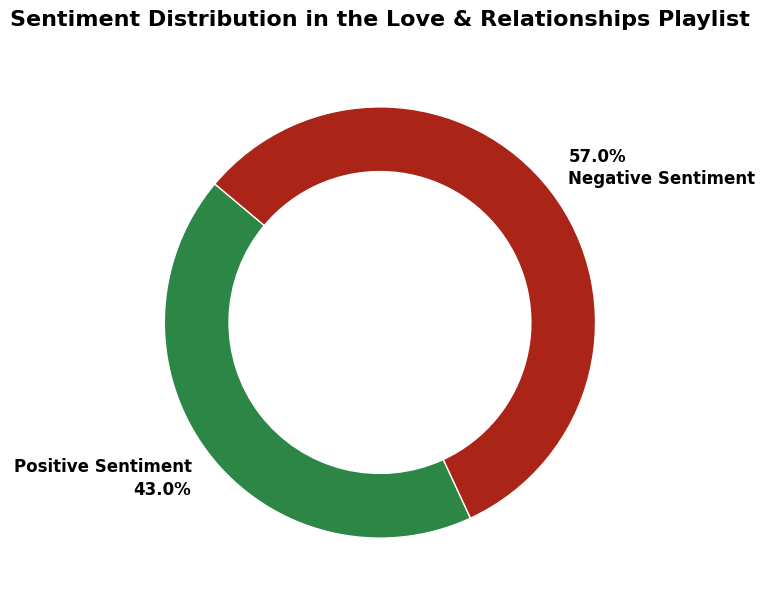

In [4]:
# Aggregate Sentiment Data
Total_Positive = sum(Featured_Songs['Positive_Lines'])
Total_Negative = sum(Featured_Songs['Negative_Lines'])

# Data for the Chart
Sentiment_Labels = ['Positive Sentiment', 'Negative Sentiment']
Sentiment_Values = [Total_Positive, Total_Negative]

# Creating the Donut Chart
fig, ax = plt.subplots(figsize = (12, 7))
wedges, texts, autotexts = ax.pie(
    Sentiment_Values, labels = Sentiment_Labels, autopct = '%1.1f%%', startangle = 140,
    colors = ['#2C8646', '#AA2417'], wedgeprops = dict(width = 0.3, edgecolor = 'w'), 
    pctdistance = 1.27
)

# Style Labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Donut Chart Style
plt.setp(autotexts, size = 12, weight = 'bold', color = 'black')

# Export Image
plt.savefig('Sentiment Distribution in the Love & Relationships Playlist.png', dpi = 300)

# Add Title
plt.title('Sentiment Distribution in the Love & Relationships Playlist', fontsize = 16, fontweight = 'bold', pad = 20) 

## Sentiment in Featured Love Songs

### Setup Stacked Bar Graph Function

In [5]:
def plot_stacked_bar_graph(Selected_Songs, Part):
    Subset_Songs = Featured_Songs[Featured_Songs['Song'].isin(Selected_Songs)]

    # Extract Data for the Plot
    Songs = Subset_Songs['Song']
    Positive_Lines = Subset_Songs['Positive_Lines']
    Negative_Lines = Subset_Songs['Negative_Lines']

    # Setup Color
    colors = ['#2C8646', '#AA2417']

    # Positions of Bars in X-Axis
    x = np.arange(len(Songs))

    # Create the Stacked Bar Graph
    fig, ax = plt.subplots(figsize = (12, 7))
    ax.bar(x, Positive_Lines, color = colors[0], label = 'Positive Lines', edgecolor = 'black', linewidth = 0.7)
    ax.bar(x, Negative_Lines, bottom = Positive_Lines, color = colors[1], label = 'Negative Lines', edgecolor = 'black', linewidth = 0.7)

    # Customize the Plot
    ax.set_xticks(x)
    ax.set_yticks(range(0, max(Positive_Lines + Negative_Lines) + 10, 5))
    ax.set_xticklabels(Songs, rotation = 45, ha = 'right', fontsize = 10, fontweight = 'bold')
    ax.set_xlabel('Song', fontsize = 14, labelpad = 10, fontweight = 'bold')
    ax.set_ylabel('Number of Lines', fontsize = 14, labelpad = 10, fontweight = 'bold')

    # Add Gridlines
    ax.grid(axis = 'y', linestyle = '--', linewidth = 0.7, alpha = 0.7)
    ax.set_axisbelow(True)

    # Optimize Layout
    plt.tight_layout()

    # Export Graph
    plt.savefig(f'Positive and Negative Lines in Selected Songs {Part}.png', dpi = 300)

    # Add Title
    ax.set_title('Positive and Negative Lines in Selected Songs', fontsize = 16, fontweight = 'bold', pad = 20)

    # Display Graph
    plt.show()

### First 10 Songs

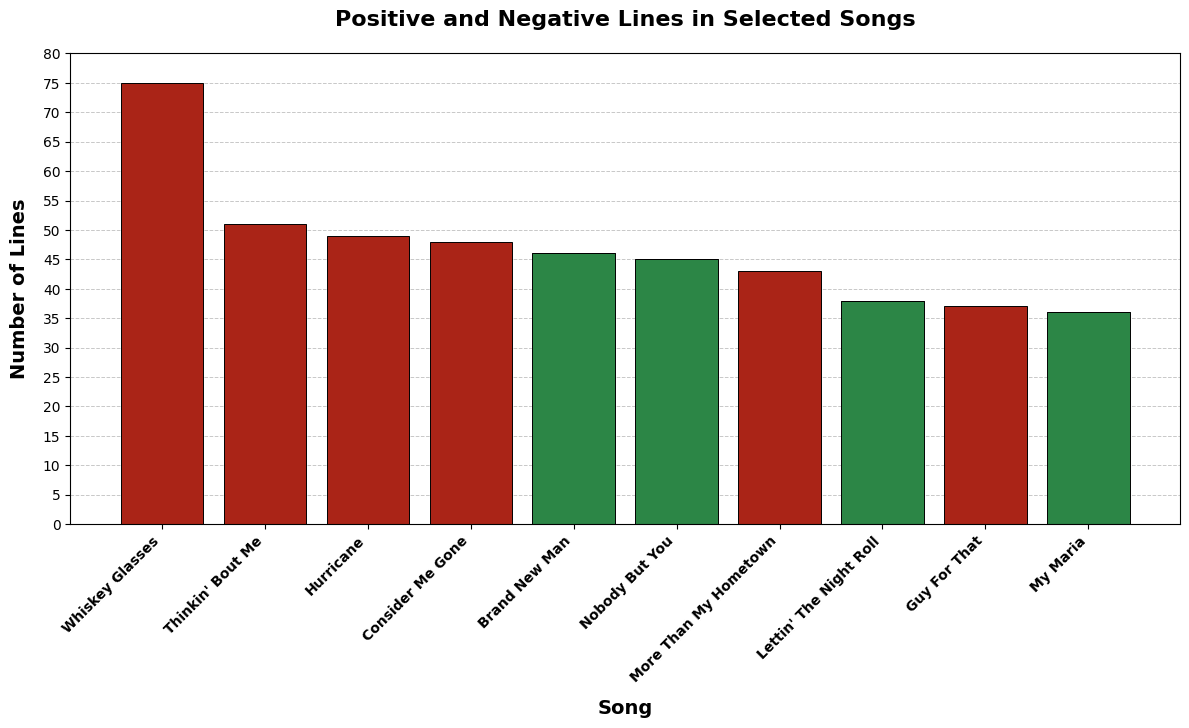

In [6]:
# Filter for the Specified Songs
Selected_Songs = [
    "Whiskey Glasses", "Thinkin' Bout Me", "Hurricane", "Consider Me Gone",
    "Brand New Man", "Nobody But You", "More Than My Hometown", 
    "Lettin' The Night Roll", "Guy For That", "My Maria",
]

# Call Stacked Bar Graph Function
plot_stacked_bar_graph(Selected_Songs, "1")

### Next 10 Songs

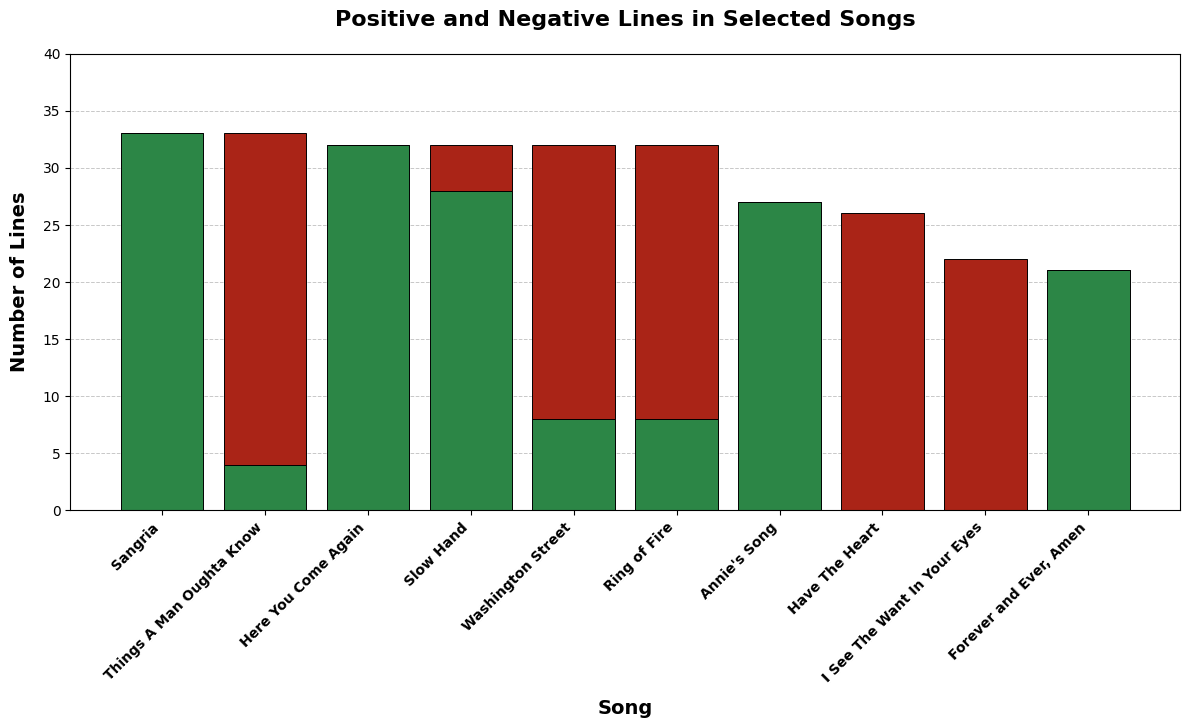

In [7]:
# Filter for the Specified Songs
Selected_Songs = [
    "Sangria", "Things A Man Oughta Know", "Here You Come Again", "Slow Hand",
    "Washington Street", "Ring of Fire", "Annie's Song", 
    "Have The Heart", "I See The Want In Your Eyes", "Forever and Ever, Amen"
]

# Call Stacked Bar Graph Function
plot_stacked_bar_graph(Selected_Songs, "2")

## Setup WordClouds

In [8]:
# Define Stopwords and Irrelevant Words
stop_words = set(stopwords.words('english'))
irrelevant_words = {"dont", "got", "im", "aint", "yeah", "gonna", "youre", "cant", "like", "get", "back", "one",
                    "take", "know", "thing", "around", "ive", "I'll", "em", "theres", "ooh", "lets", "yeah",
                    "let", "go", "whoa", "oh", "even", "well", "'cause", "side", "tell", "we're", "thats",
                    "said", "hey", "round", "way", "hes", "bout", "many", "say", "took"}

# Combine Stopwords with Irrelevant Words
all_stopwords = stop_words.union(irrelevant_words)

# Filter out Stopwords
Lyrics_in_Context = Lyrics_in_Context[~Lyrics_in_Context['Word'].isin(all_stopwords)]

# Color Function
def custom_colors(Word, **kwargs):
    # Prioritize Primary Color with Higher Probability
    colors = [Primary_Color] * 2 + Secondary_Colors
    return random.choice(colors)

# Define WordCloud Function and Get Top 10 Words
def generate_wordcloud_and_top_words(Sentiment, top_n = 10):   
    # Filter Data for the Specified Sentiment
    filtered_data = Lyrics_in_Context[Lyrics_in_Context['Sentiment'] == Sentiment]

    # Create a Dictionary with Words and Their Frequencies
    word_frequencies = filtered_data.groupby('Word')['Cnt_of_Word'].sum().to_dict()

    # Generate the WordCloud
    wordcloud = WordCloud(
                            width = 800,
                            height = 400,
                            background_color = 'white',
                            color_func = custom_colors,
                            prefer_horizontal = 1.0
                         ).generate_from_frequencies(word_frequencies)

    # Plot the WordCloud
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(f'{Sentiment} Words in Love and Relationships.png', dpi=300)
    plt.title(f'{Sentiment} Words in Love and Relationships', fontsize = 16)
    plt.show()

    # Get the Top N Words with Their Counts
    top_words = sorted(word_frequencies.items(), key = lambda x: x[1], reverse = True)[:top_n]

    print(f'Top {top_n} most popular {Sentiment} words with their counts:')
    for word, count in top_words:
        print(f'{word}: {count}')

### Positivity in Love and Relationships

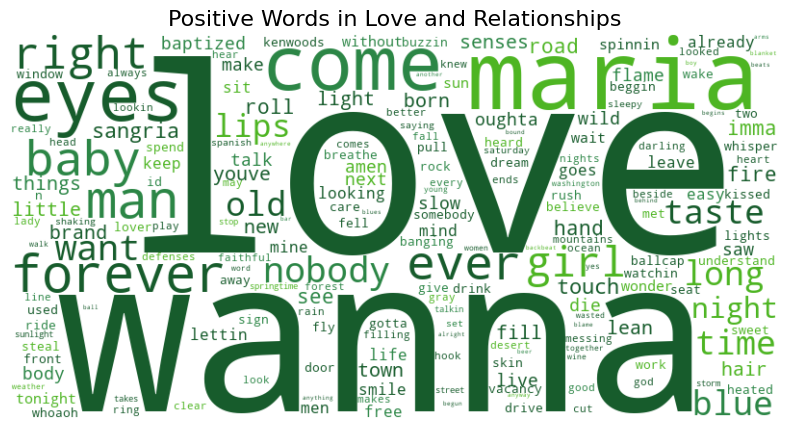

Top 10 most popular Positive words with their counts:
love: 54
wanna: 37
maria: 33
come: 18
eyes: 18
forever: 13
man: 13
baby: 11
ever: 11
right: 11


In [9]:
# Define the Custom Color Palette
Primary_Color = '#175C2C'
Secondary_Colors = ['#2C8646', '#4EB523']

# Call the WordCloud Function for Positive Sentiment
generate_wordcloud_and_top_words('Positive')

### Negativity in Love and Relationships

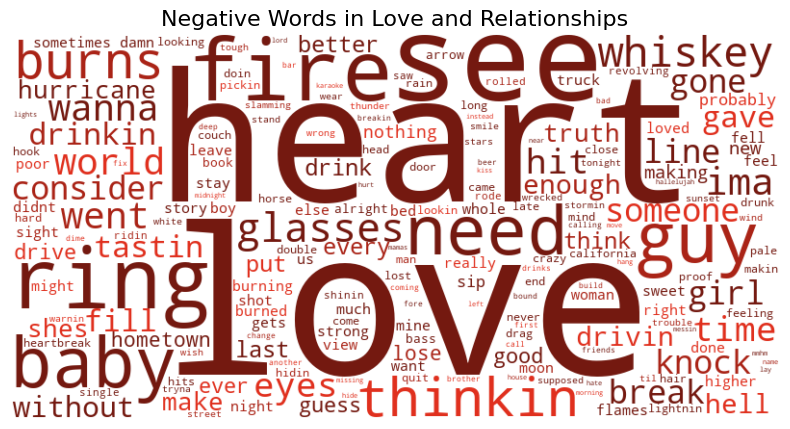

Top 10 most popular Negative words with their counts:
love: 31
heart: 23
see: 22
fire: 19
ring: 19
baby: 18
guy: 18
need: 17
thinkin: 17
burns: 15


In [10]:
# Define the Custom Color Palette
Primary_Color = '#741910'
Secondary_Colors = ['#AA2417', '#E0301E']

# Call the WordCloud Function for Positive Sentiment
generate_wordcloud_and_top_words('Negative')

# Song Transitions

![Alt text](Images/Themes.png)

## Popular Themes in Playlist

Text(0.5, 1.0, 'Popular Themes in the Love and Relationships Playlist')

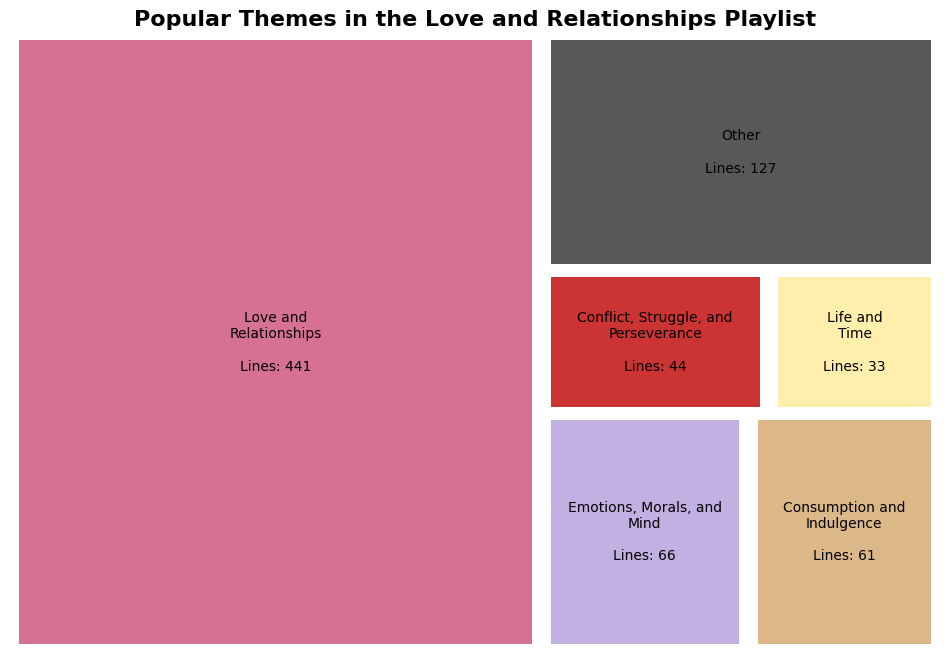

In [11]:
# Count Line Occurrences of Each Theme
Theme_Counts = Lines_Categorized['Classification'].value_counts()

# Keep Top 5 Themes, Sum the Remaining as Other
Top_N = 5
Top_Themes = Theme_Counts.nlargest(Top_N)
Other_Count = Theme_Counts.iloc[Top_N:].sum()
Theme_Counts_Filtered = pd.concat([Top_Themes, pd.Series({'Other': Other_Count})])

# Define Custom Colors for Each Theme
Custom_Colors = {
    "Love and Relationships": "#CC4D7A",
    "Other": "#2E2E2E",
    "Conflict, Struggle, and Perseverance": "#C00000",
    "Life and Time": "#FFEB99",
    "Emotions, Morals, and Mind": "#B39DDB",
    "Consumption and Indulgence": "#D4A76A"
}

# Assign Colors
Colors = [Custom_Colors.get(theme, "#808080") for theme in Theme_Counts_Filtered.index]

# Format labels
Formatted_Labels = [f"{label.replace(' and ', ' and\n')}\n\nLines: {size}" for label, size in zip(Theme_Counts_Filtered.index, Theme_Counts_Filtered.values)]

# Create the treemap
plt.figure(figsize = (12, 8))
squarify.plot(sizes = list(Theme_Counts_Filtered.values), label = Formatted_Labels, color = Colors, alpha = 0.8, pad = True)
plt.axis('off')

plt.savefig(f'Popular Themes in Playlist.png', dpi = 300)

# Title and Formatting
plt.title('Popular Themes in the Love and Relationships Playlist', fontsize = 16, fontweight = 'bold')

## Sankey Charts

### Setup Sankey Chart Function

In [12]:
# Define Theme Colors
Theme_Colors = {
    'Love and Relationships': '#CC4D7A', 'Life and Time': '#FFEB99', 'Freedom and Independence': '#FFC000', 'Age, Nostalgia, and Memory': '#FFB6A3',
    'Hobbies, Pastimes, and Jokes': '#009688', 'Emotions, Morals, and Mind': '#B39DDB', 'Family, Friends, and Roots': '#92D050',
    'Nature and the Environment': '#4D7A4D', 'Consumption and Indulgence': '#D4A76A', 'Gears and Gasoline': '#7B7B7B',
    'Death, Faith, and Religion': '#7030A0', 'Occupations, Work, and Money': '#0070C0', 'Americana': '#002060', 
    'Technology and Modern Life': '#00B050', 'Conflict, Struggle, and Perseverance': '#C00000', 
    'Outliers': '#2E2E2E', 'Music, Dance, and Celebration': '#E97451',
    'Geographic Identities': '#4DAACC'
}

def generate_sankey(Song_Title):
    # Filter Data for the Specified Song
    Song_Subset = Lines_Categorized[Lines_Categorized['Song_Title'] == Song_Title].sort_values(by = 'Line_Number')

    if len(Song_Subset) < 2:
        print(f"Not enough data for '{Song_Title}' to generate transitions.")
        return

    # Create Transitions: Line i -> Line i+1
    Song_Subset['Next_Classification'] = Song_Subset['Classification'].shift(-1)
    Transitions = Song_Subset[['Classification', 'Next_Classification']].dropna()

    # Count occurrences
    Transition_Counts = (Transitions.groupby(['Classification','Next_Classification']).size().reset_index(name = 'Count'))

    if Transition_Counts.empty:
        print(f"No valid transitions for '{Song_Title}'.")
        return

    # All Unique Themes
    Unique_Themes = sorted(set(Transition_Counts['Classification']) | set(Transition_Counts['Next_Classification']))

    # Build Two Sets of Nodes: Left (Previous Line) + Right (Next Line)
    left_nodes  = [t + "_L" for t in Unique_Themes]
    right_nodes = [t + "_R" for t in Unique_Themes]
    all_nodes   = left_nodes + right_nodes

    # Map Node Names to Indices
    node_idx_map = {name: i for i, name in enumerate(all_nodes)}

    # Prepare Label & Color Arrays to Match All_Nodes Order
    labels = []
    colors = []
    x_positions = []

    for theme in Unique_Themes:
        # Left node
        labels.append(theme)
        colors.append(Theme_Colors.get(theme, '#808080'))
        # Shift slightly in from 0.0 so label text is not cut off
        x_positions.append(0.05)

    for theme in Unique_Themes:
        # Right node
        labels.append(theme)
        colors.append(Theme_Colors.get(theme, '#808080'))
        # Shift slightly left from 1.0 so label text can appear on right
        x_positions.append(0.95)

    source_list = []
    target_list = []
    value_list  = []
    link_colors = []

    for _, row in Transition_Counts.iterrows():
        theme_left  = row['Classification']
        theme_right = row['Next_Classification']
        count_val   = row['Count']

        left_node_name  = theme_left + "_L"
        right_node_name = theme_right + "_R"

        s_idx = node_idx_map[left_node_name]
        t_idx = node_idx_map[right_node_name]

        source_list.append(s_idx)
        target_list.append(t_idx)
        value_list.append(count_val)

        # Make link color = color of the left bucket
        link_colors.append(colors[s_idx])

    # Create the Sankey figure
    fig = go.Figure(data = [go.Sankey(
        arrangement = "freeform",
        node=dict(pad = 15, thickness = 20, line = dict(color = 'black', width = 0.5), label = labels, color = colors, x = x_positions),
        link = dict(source = source_list, target = target_list, value = value_list, color = link_colors)
    )])

    fig.update_layout(
        title_text = f"Line to Theme Transitions in {Song_Title}",
        font_size = 10,
        width = 1000,  # increased width for label space
        height = 600,
        margin = dict(l = 50, r = 50, t = 50, b = 50),  # extra space if needed
    )

    # Show in notebook
    fig.show()

### Nobody But You by Blake Shelton and Gwen Stefani

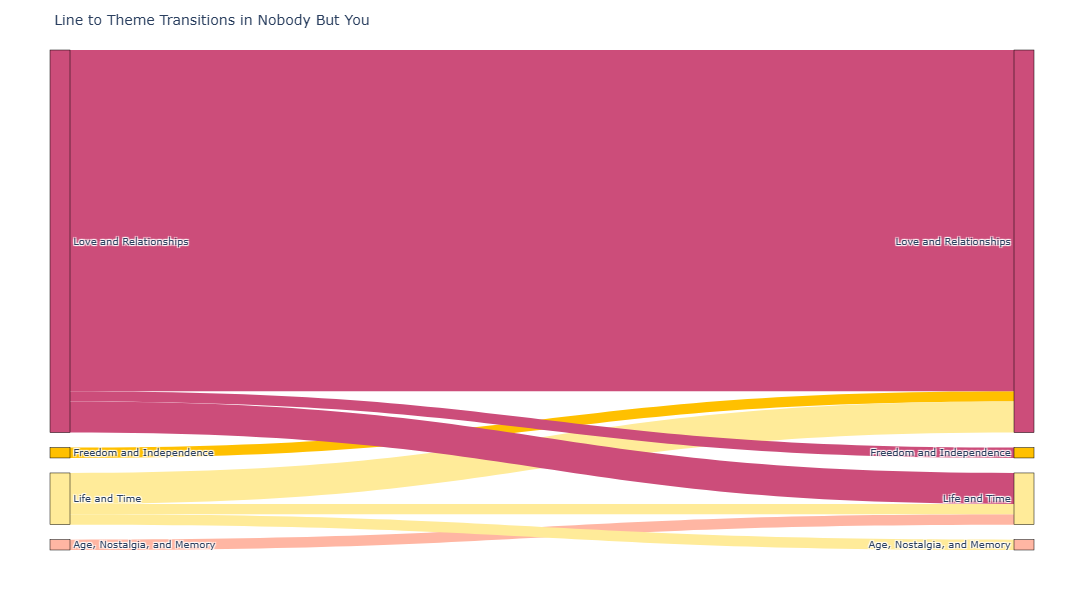

In [13]:
generate_sankey('Nobody But You')

![Alt text](Images/Sankey%20Charts/Nobody%20But%20You.png)

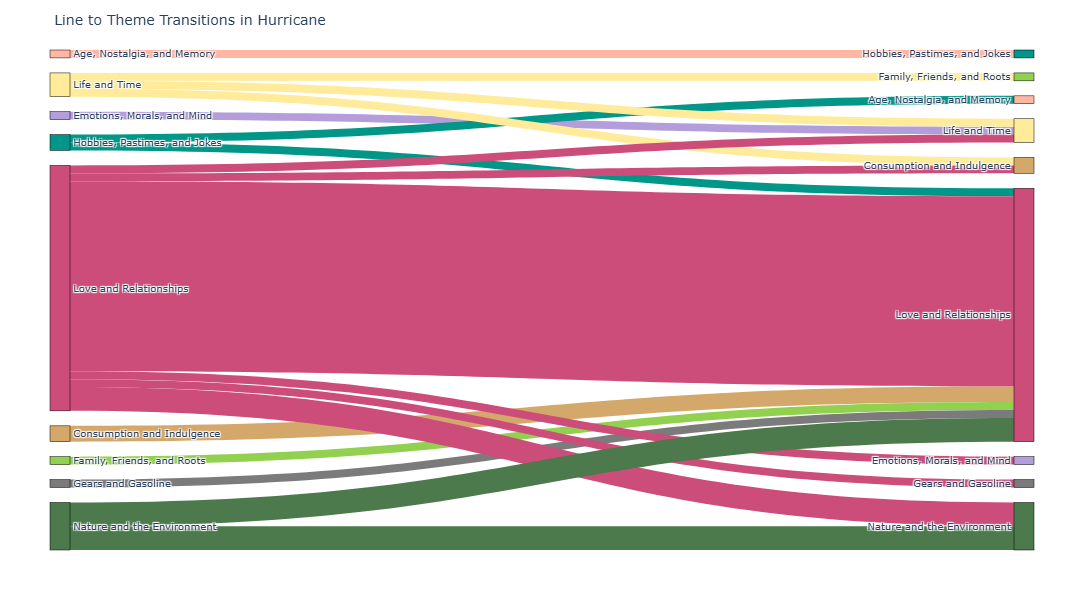

In [14]:
generate_sankey('Hurricane')

![Alt text](Images/Sankey%20Charts/Hurricane.png)

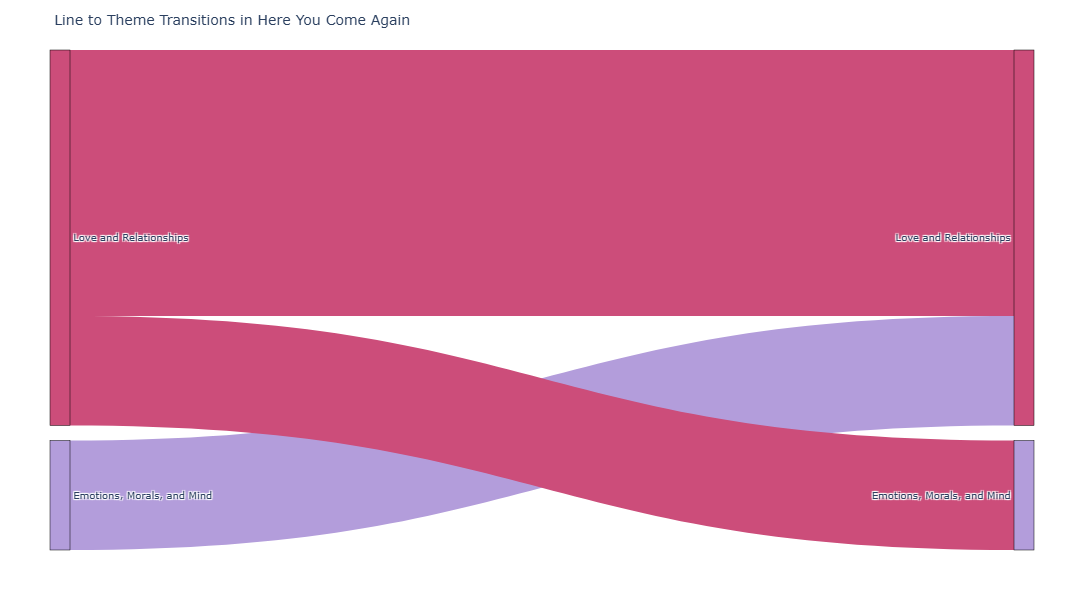

In [15]:
generate_sankey('Here You Come Again')

![Alt text](Images/Sankey%20Charts/Here%20You%20Come%20Again.png)

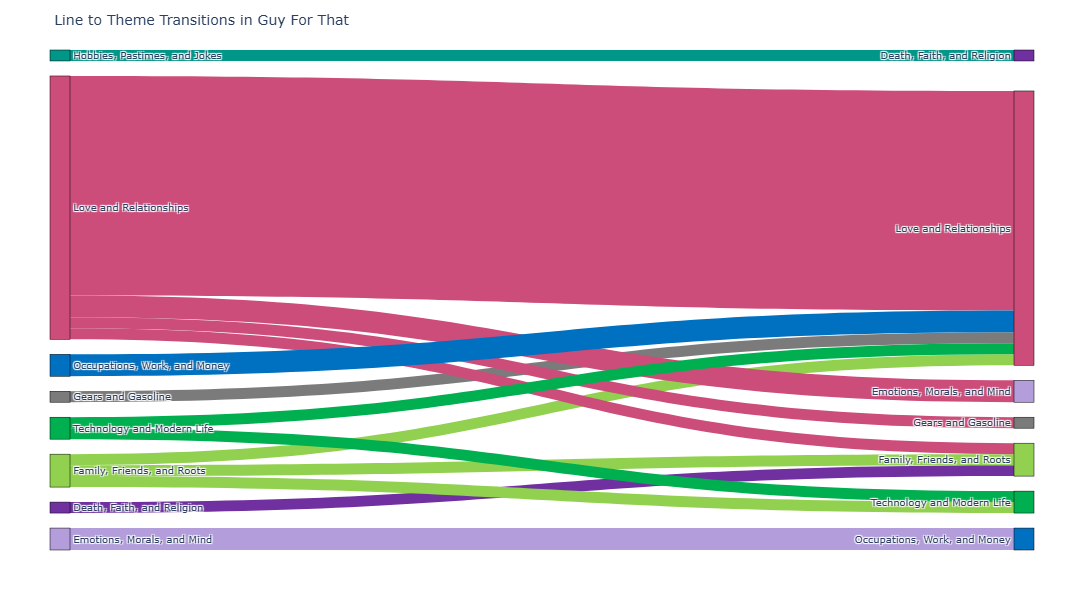

In [16]:
generate_sankey('Guy For That')

![Alt text](Images/Sankey%20Charts/Guy%20For%20That.png)

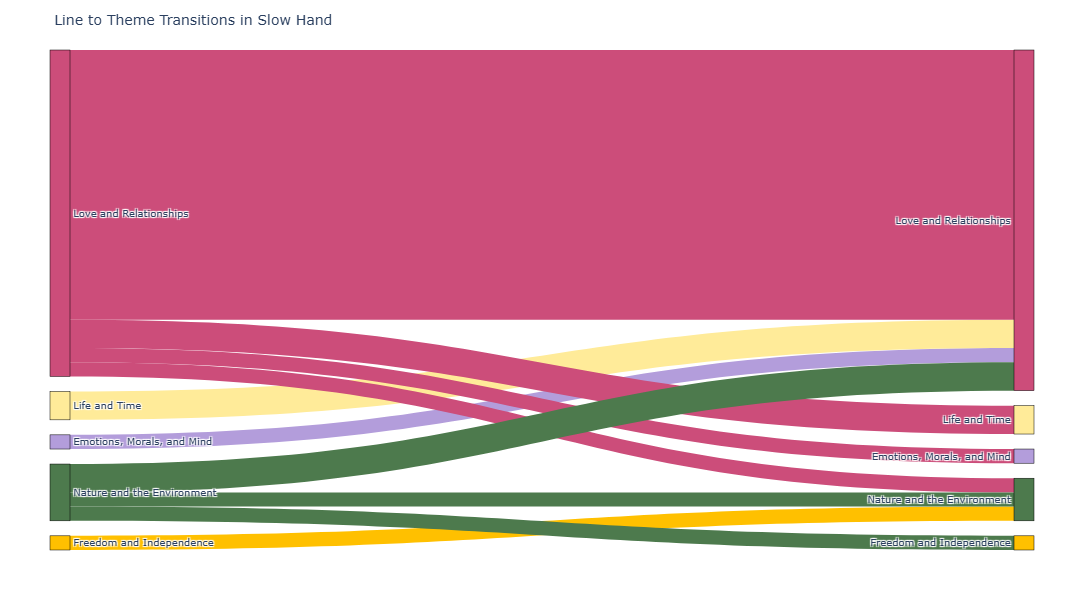

In [17]:
generate_sankey('Slow Hand')

![Alt text](Images/Sankey%20Charts/Slow%20Hand.png)

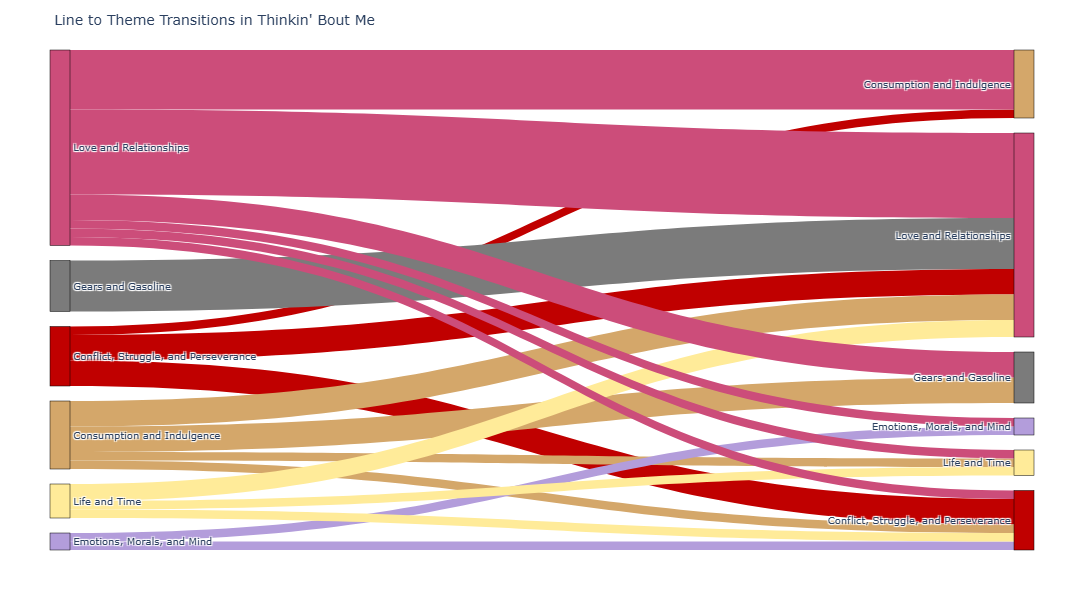

In [18]:
generate_sankey("Thinkin' Bout Me")

![Alt text](Images/Sankey%20Charts/Thinkin'%20Bout%20Me.png)

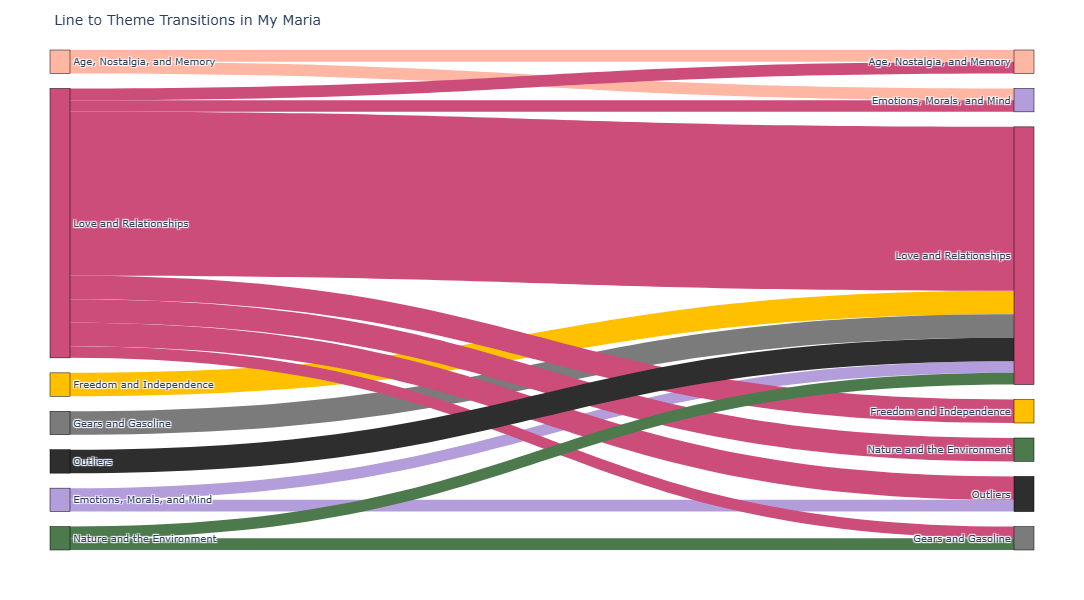

In [19]:
generate_sankey("My Maria")

![Alt text](Images/Sankey%20Charts/My%20Maria.png)

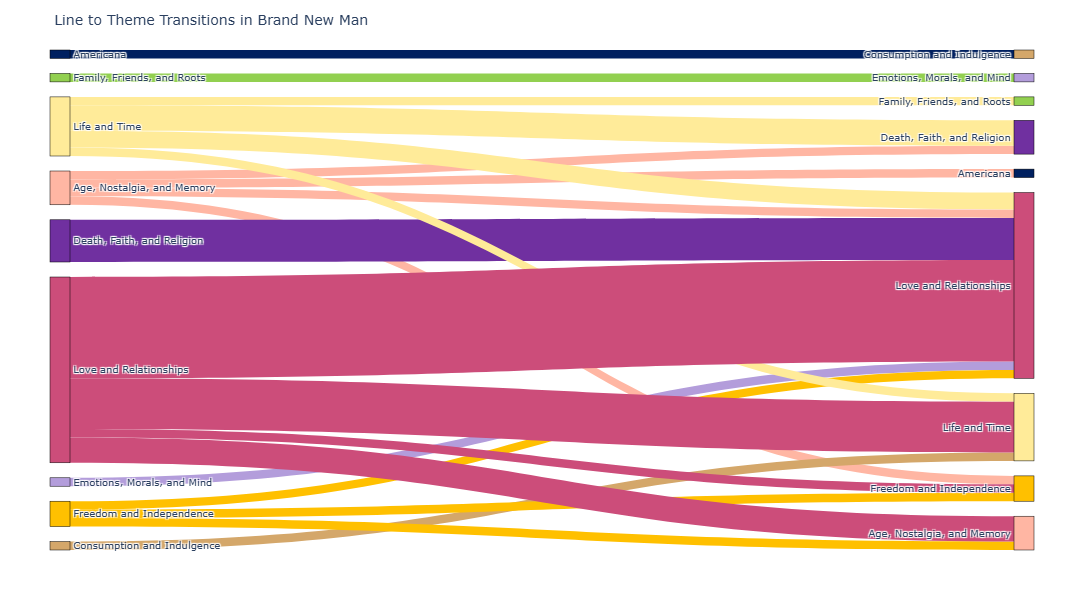

In [20]:
generate_sankey("Brand New Man")

![Alt text](Images/Sankey%20Charts/Brand%20New%20Man.png)

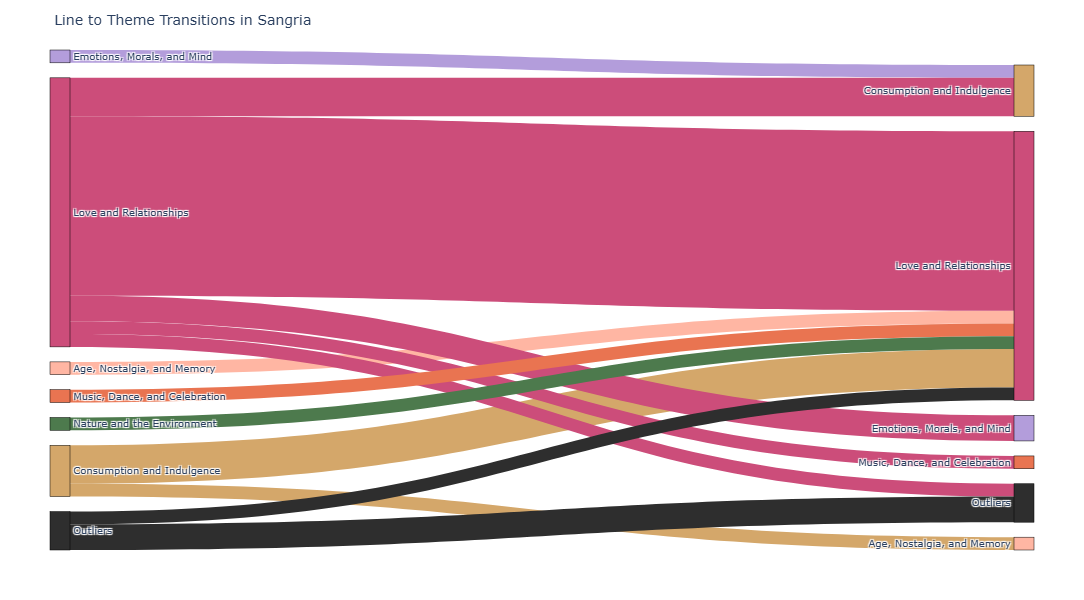

In [21]:
generate_sankey("Sangria")

![Alt text](Images/Sankey%20Charts/Sangria.png)

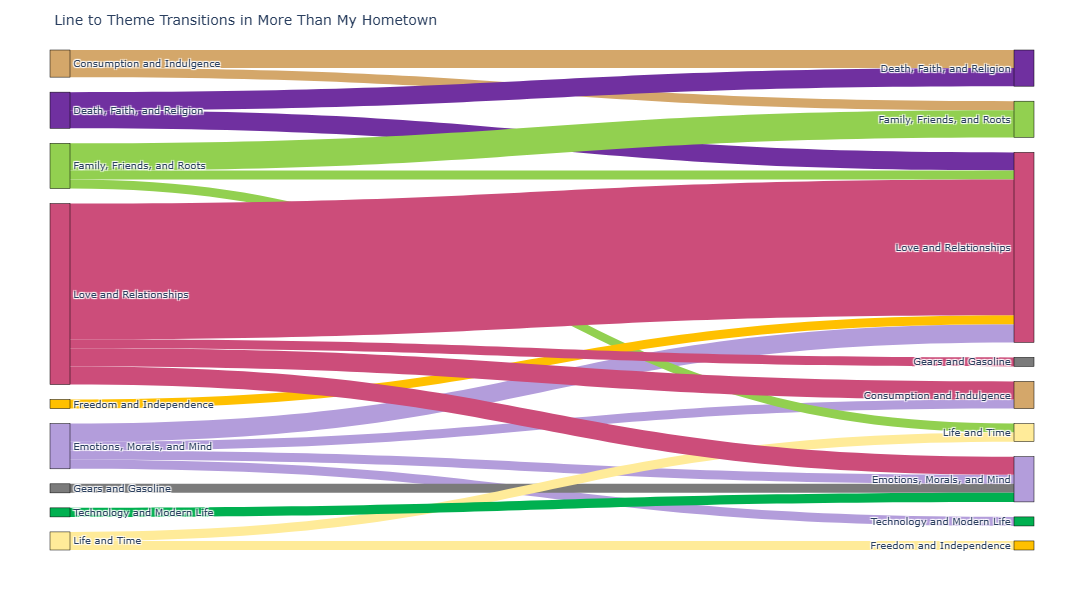

In [22]:
generate_sankey("More Than My Hometown")

![Alt text](Images/Sankey%20Charts/More%20Than%20My%20Hometown.png)

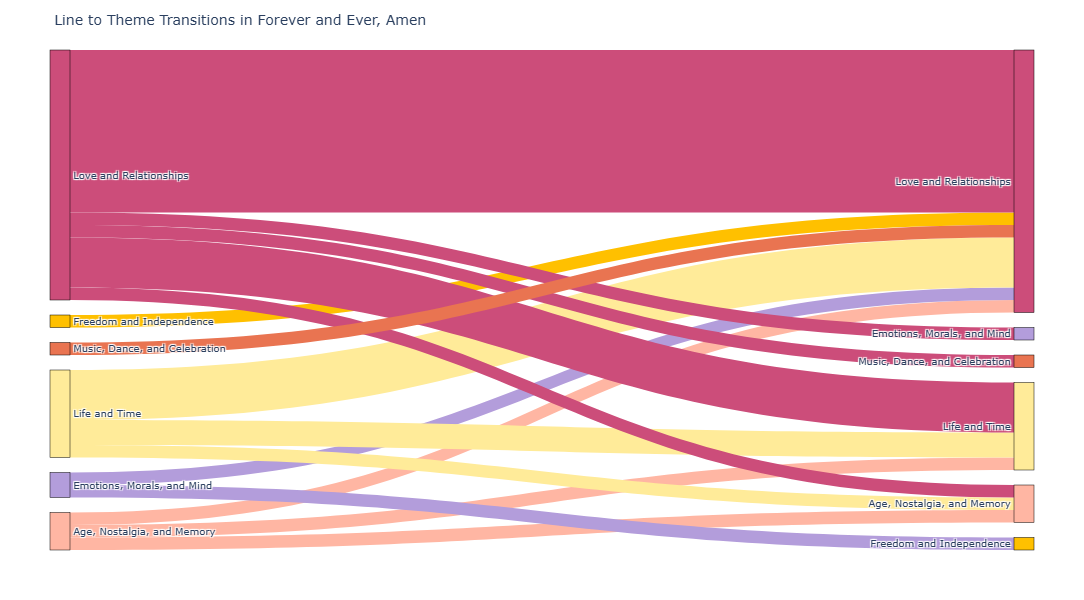

In [23]:
generate_sankey("Forever and Ever, Amen")

![Alt text](Images/Sankey%20Charts/Forever%20and%20Ever,%20Amen.png)

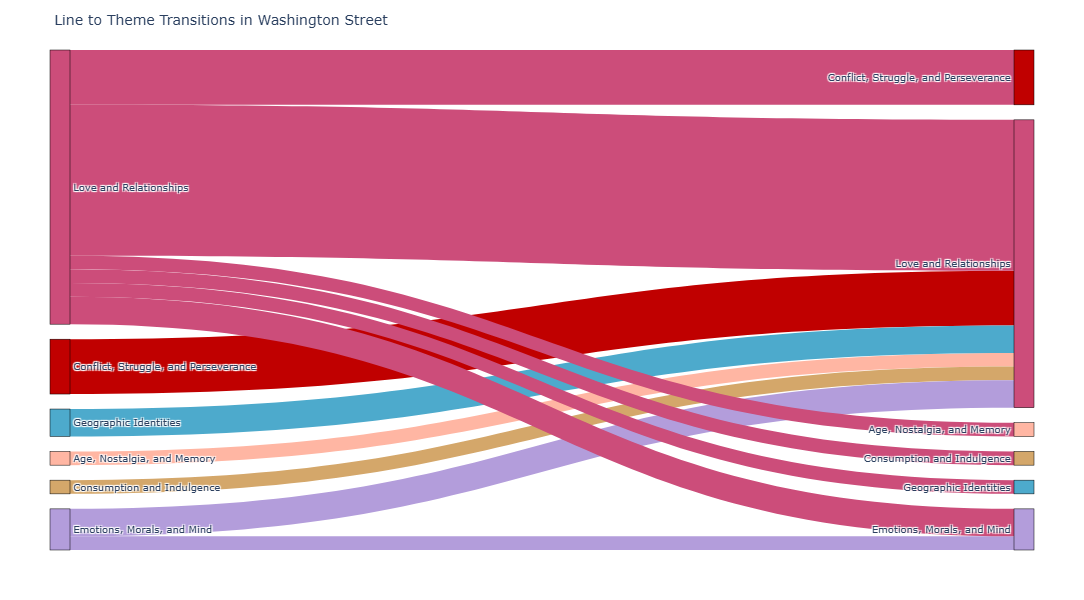

In [24]:
generate_sankey("Washington Street")

![Alt text](Images/Sankey%20Charts/Washington%20Street.png)

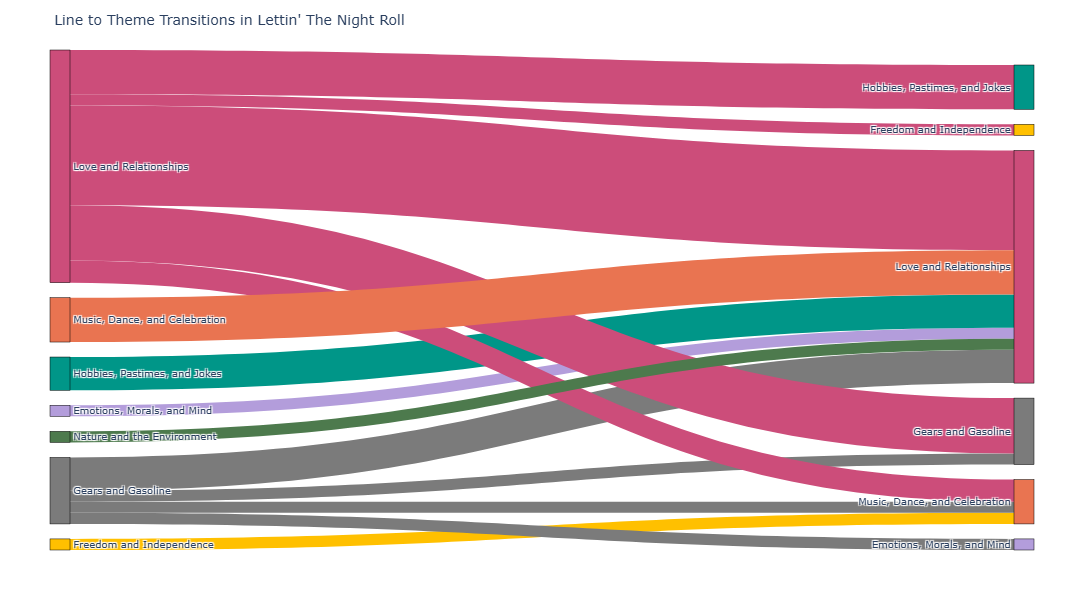

In [25]:
generate_sankey("Lettin' The Night Roll")

![Alt text](Images/Sankey%20Charts/Lettin'%20The%20Night%20Roll.png)

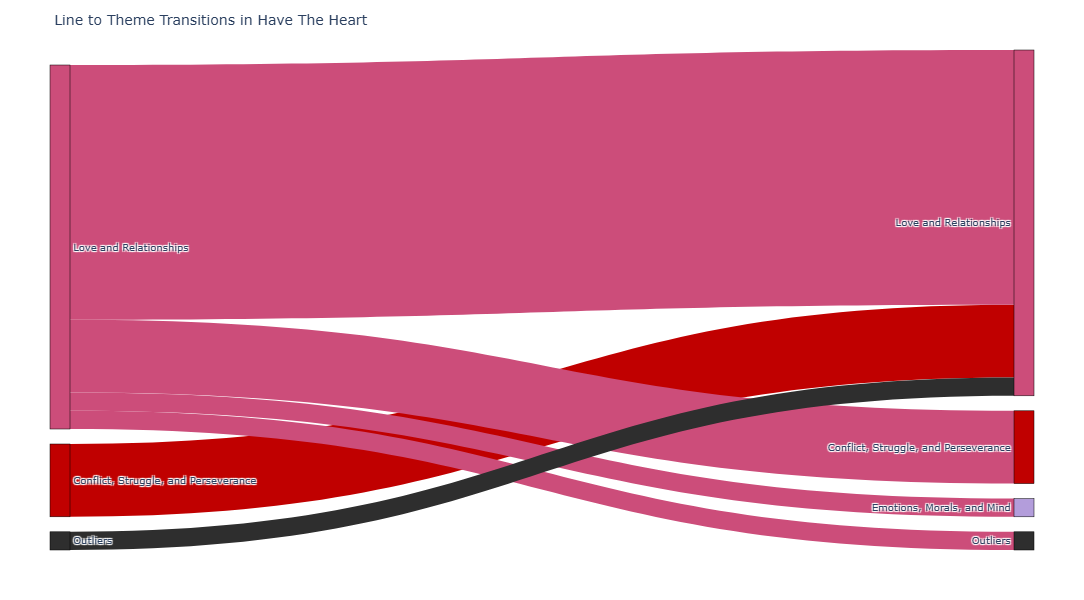

In [26]:
generate_sankey("Have The Heart")

![Alt text](Images/Sankey%20Charts/Have%20The%20Heart.png)

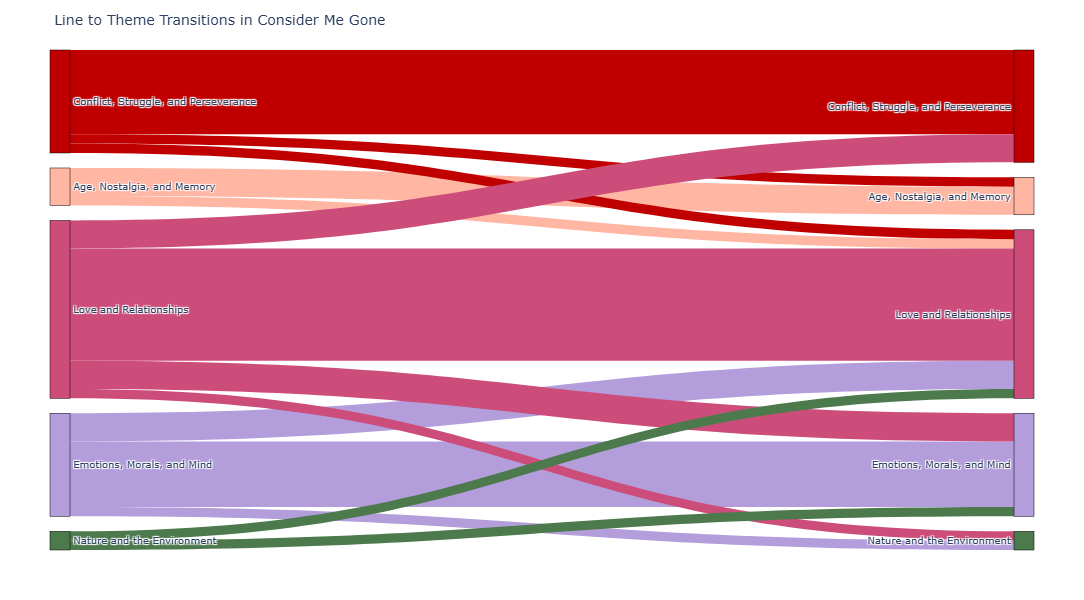

In [27]:
generate_sankey("Consider Me Gone")

![Alt text](Images/Sankey%20Charts/Consider%20Me%20Gone.png)

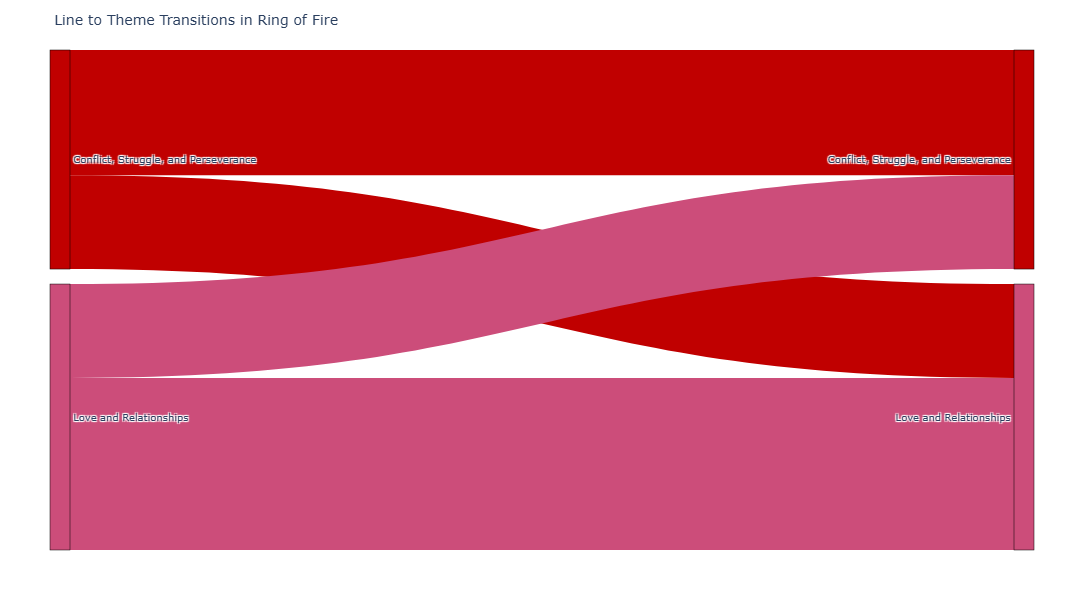

In [28]:
generate_sankey("Ring of Fire")

![Alt text](Images/Sankey%20Charts/Ring%20of%20Fire.png)

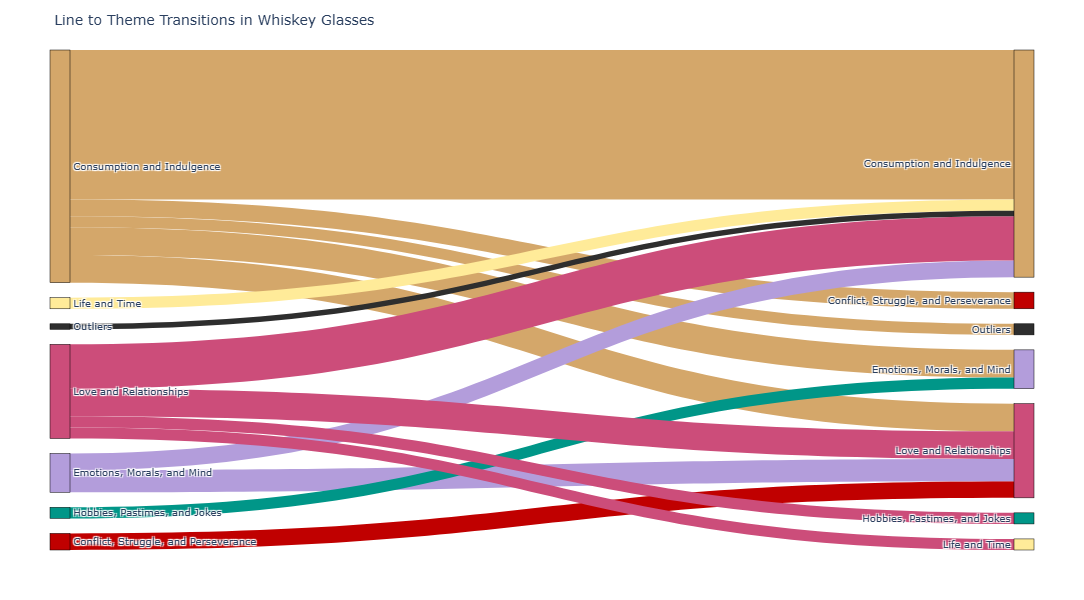

In [29]:
generate_sankey("Whiskey Glasses")

![Alt text](Images/Sankey%20Charts/Whiskey%20Glasses.png)

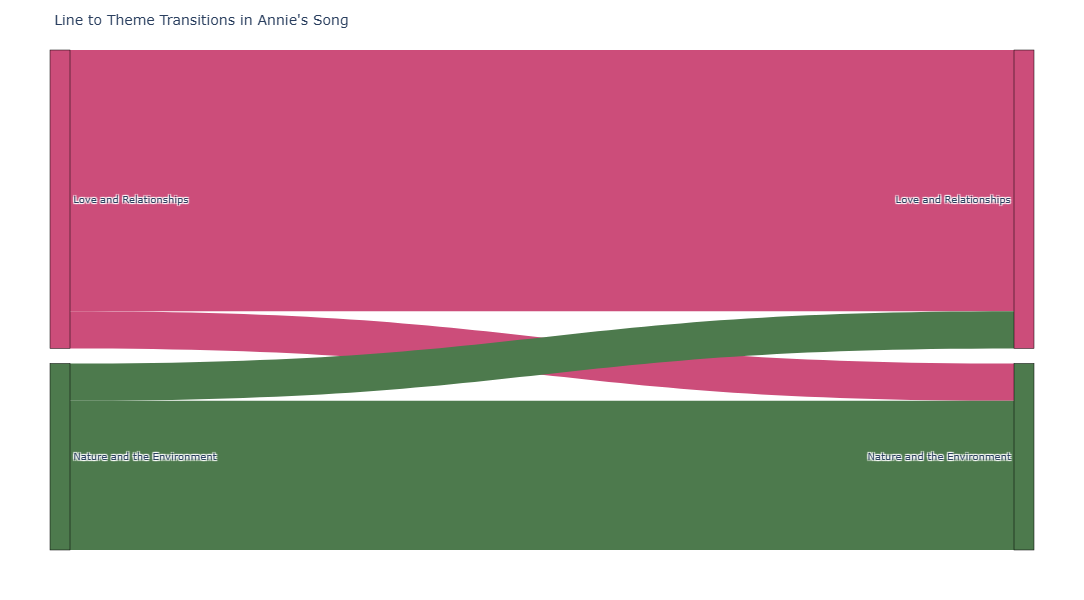

In [30]:
generate_sankey("Annie's Song")

![Alt text](Images/Sankey%20Charts/Annie's%20Song.png)

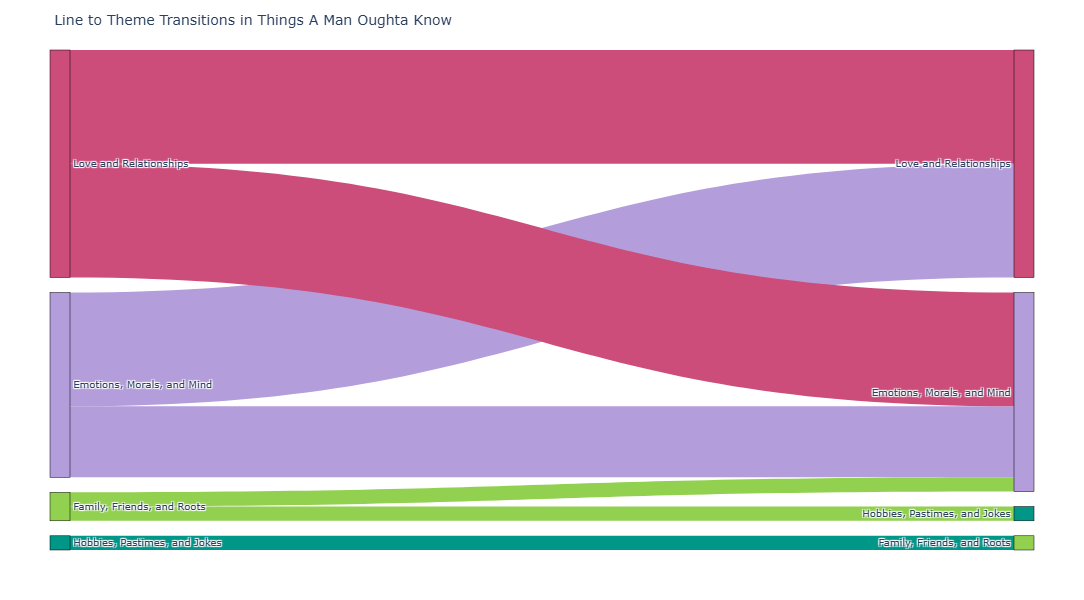

In [31]:
generate_sankey("Things A Man Oughta Know")

![Alt text](Images/Sankey%20Charts/Things%20A%20Man%20Oughta%20Know.png)

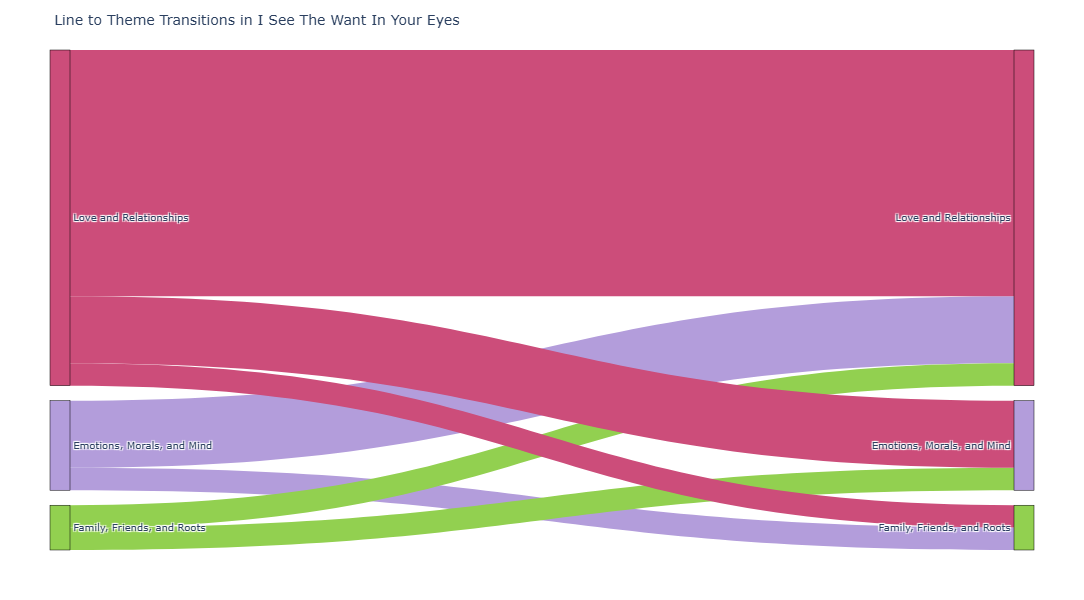

In [32]:
generate_sankey("I See The Want In Your Eyes")

![Alt text](Images/Sankey%20Charts/I%20See%20The%20Want%20In%20Your%20Eyes.png)

# Findings:

![Alt text](Images/Findings.png)

![Alt text](Images/Thank_You.png)